In [64]:
# Movie Recommendations
"""
Many streaming platform services (Spotify, Netflix, Amazon, youtube, etc.) try to learn your interests or habits and make recommendations on products and services according to it's interpretation of your tendencies. 
You are what you love and you love what you are. Algorithms simply refines that echo chamber to tickle your ego.
Recommendation engines are under the umbrella of AI. Recommender system is one of the techniques in ML.
    In the context of movie recs, the engine predicts the rating a consumer might give to a movie. 
    Then the machine ranks the movies according to how it thinks the consumer might like them.
    Relevancy to the consumer is key. 
    The engine runs on filtering -- content or collaborative. 
    Content filtering is based on other users who are similar to you demographically (age, gender, geogpraphy, etc.). 
    Collaborative filtering is based on your recorded behaviors. 
    It also extrapolates your profile by considering other users who share similar behaviors as you.
    The assumption is you and the other similar profiles probably have high likelihood of overlaps in movie tastes. 
    
Now I'd like to give this a try by pretending i'm Netflix.

Python 3.9.5
"""

"\nMany streaming platform services (Spotify, Netflix, Amazon, youtube, etc.) try to learn your interests or habits and make recommendations on products and services according to it's interpretation of your tendencies. \nYou are what you love and you love what you are. Algorithms simply refines that echo chamber to tickle your ego.\nRecommendation engines are under the umbrella of AI. Recommender system is one of the techniques in ML.\n    In the context of movie recs, the engine predicts the rating a consumer might give to a movie. \n    Then the machine ranks the movies according to how it thinks the consumer might like them.\n    Relevancy to the consumer is key. \n    The engine runs on filtering -- content or collaborative. \n    Content filtering is based on other users who are similar to you demographically (age, gender, geogpraphy, etc.). \n    Collaborative filtering is based on your recorded behaviors. \n    It also extrapolates your profile by considering other users who sha

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io #pip install scikit-image

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
df = pd.read_csv(r"C:\Users\ckraft\Desktop\My Experiments\Personal Use\NetflixMovies.csv")
df.drop('imdb_id',axis = 1, inplace = True)
df.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,414906,The Batman,Crime-Mystery-Thriller,en,In his second year of fighting crime Batman uncovers corruption in Gotham City that connects to his own family while facing a serial killer known as the Riddler.,8195.597,6th & Idaho-Dylan Clark Productions-DC Films-Warner Bros. Pictures,3/1/2022,185000000,759793000,176.0,Released,Unmask the truth.,7.8,4165,Robert Pattinson-Zoë Kravitz-Paul Dano-Jeffrey Wright-John Turturro-Peter Sarsgaard-Andy Serkis-Colin Farrell-Jayme Lawson-Gil Perez-Abraham-Peter McDonald-Con O'Neill-Alex Ferns-Rupert Penry-Jones-Charlie Carver-Max Carver-Barry Keoghan-Kosha Engler-Archie Barnes-Janine Harouni-Hana Hrzic-Joseph Walker-Luke Roberts-Oscar Novak-Stella Stocker-Sandra Dickinson-Jack Bennett-Andre Nightingale-Richard James-Neale-Lorraine Tai-Joseph Balderrama-James Eeles-Dave Simon-Angela Yeoh-Leemore Marrett Jr.-Ezra Elliott-Itoya Osagiede-Stewart Alexander-Adam Rojko Vega-Heider Ali-Marcus Onilude-Elena Saurel-Ed Kear-Sid Sagar-Amanda Blake-Todd Boyce-Brandon Bassir-Will Austin-Chabris Napier-Lawrence-Douglas Russell-Phil Aizlewood-Mark Killeen-Philip Shaun McGuinness-Lorna Brown-Elliot Warren-Jay Lycurgo-Stefan Race-Elijah Baker-Craige Middleburg-Akie Kotabe-Spike Fearn-Urielle Klein-Mekongo-Bronson Webb-Madeleine Gray-Ste Johnston-Arthur Lee-Parry Glasspool-Jordan Coulson-Hadas Gold-Pat Battle-Bobby Cuza-Dean Meminger-Roma Torre-Mike Cappozola-Amanda Hurwitz-Joshua Eldridge-Smith-Daniel Rainford-Nathalie Armin-Jose Palma-Kazeem Tosin Amore-Rodrig Andrisan,crime fighter-secret identity-nightclub-politician-police-psychopath-vigilante-superhero-based on comic-organized crime-serial killer-millionaire-social injustice-murder investigation-masked superhero-political corruption-neo-noir-vengeance-mayoral election,/74xTEgt7R36Fpooo50r9T25onhq.jpg,/tRS6jvPM9qPrrnx2KRp3ew96Yot.jpg,335787-508947-696806-777270-833425-718032-505026-634649-597208-787752-884971-511809-800510-476669-760104-646385-763285-632727-406759-753232-823625
1,634649,Spider-Man: No Way Home,Action-Adventure-Science Fiction,en,Peter Parker is unmasked and no longer able to separate his normal life from the high-stakes of being a super-hero. When he asks for help from Doctor Strange the stakes become even more dangerous forcing him to discover what it truly means to be Spider-Man.,4716.995,Marvel Studios-Pascal Pictures-Columbia Pictures,12/15/2021,200000000,1892000000,148.0,Released,The Multiverse unleashed.,8.1,12300,Tom Holland-Zendaya-Benedict Cumberbatch-Jacob Batalon-Jon Favreau-Jamie Foxx-Willem Dafoe-Alfred Molina-Benedict Wong-Tony Revolori-Marisa Tomei-Andrew Garfield-Tobey Maguire-Angourie Rice-Arian Moayed-Paula Newsome-Hannibal Buress-Martin Starr-J.B. Smoove-J.K. Simmons-Rhys Ifans-Charlie Cox-Thomas Haden Church-Haroon Kahn-Emily Fong-Mary Rivera-Rudy Eisenzopf-Kathleen Cardoso-Jonathan Sam-Andrew Dunlap-Ben VanderMey-Zany Dunlap-B. Clutch Dunlap-Minnah Dunlap-Gary Weeks-Gregory Konow-Carol Anne Dines-Anisa Nyell Johnson-Willie Burton-Mallory Hoff-Greg Clarkson-Regina Ting Chen-Robert Mitchel Owenby-Glenn Keogh-Paris Benjamin-Jwaundace Candece-Taylor St. Clair-Gabriella Cila-Darnell Appling-Rolando Fernandez-Edward Force-Michael Le-Dean Meminger-Frederick A. Brown-Cristo Fernández-Clay Savage-Tom Hardy-Jake Gyllenhaal-Jay Karales,new york city-loss of loved one-showdown-secret identity-hero-magic-villain-vigilante-portal-sequel-superhero-based on comic-alternate reality-masked vigilante-nostalgic-aftercreditsstinger-duringcreditsstinger-marvel cinematic universe (mcu)-teenage hero-multiverse-alternate universe-crossover-teamwork,/1g0dhYtq4irTY1GPXvft6k4YLjm.jpg,/iQFcwSGbZXMkeyKrxbPnwnRo5fl.jpg,646380-624860-568124-524434-580489-425909-476669-566525-460458-512195-511809-644495-696806-537116-438695-646385-414906-508947

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299889 entries, 0 to 299888
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    299889 non-null  int64  
 1   title                 299888 non-null  object 
 2   genres                262088 non-null  object 
 3   original_language     299889 non-null  object 
 4   overview              280589 non-null  object 
 5   popularity            299889 non-null  float64
 6   production_companies  201904 non-null  object 
 7   release_date          296036 non-null  object 
 8   budget                299889 non-null  int64  
 9   revenue               299889 non-null  int64  
 10  runtime               291346 non-null  float64
 11  status                299889 non-null  object 
 12  tagline               81319 non-null   object 
 13  vote_average          299889 non-null  float64
 14  vote_count            299889 non-null  int64  
 15  

In [68]:
# Query all (unique) movie titles in the table
print(df['title'].unique)

<bound method Series.unique of 0                                                The Batman
1                                   Spider-Man: No Way Home
2                                                The Outfit
3                                               Turning Red
4                                      Sonic the Hedgehog 2
                                ...                        
299884                                Leave It At The Altar
299885                                              Grenzen
299886                                  No Limbs, No Limits
299887    On a Wing and a Prayer: An American Muslim Lea...
299888                                            Countdown
Name: title, Length: 299889, dtype: object>


In [69]:
# Feature Extraction 
"""
Pairwise comparison test is a statistical method that evaluates relationships between pairs of means in gorup comparisons.
The steps are as follows:
1. Text processing via Term Frequency Inverse Document Frequency (TF-IDF) vectors.
    Frequency = term instances/total instances of words (or features).
    Inverse Document Frequency = relative count of docs/docs with term.
2. Build matrices of words and movies using scikit learn as it has a built in class "TfIdfVectorizer".
    This class is equivalent to CountVectorizer which converts text to numerics.
    cols = words
    rows = movies
"""
# Lemmatization
""" 
The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
am, are, is --> be
car, cars, car's, cars' --> car

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
Linguistic processing for stemming or lemmatization is often done by an additional plug-in component to the indexing process, and a number of such components exist, both commercial and open-source.

"""
def lemmatization():
    import nltk
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')
    from nltk.corpus import wordnet, stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import sent_tokenize, word_tokenize
    df['overview'] = df['overview'].fillna('')

# Tokenize the tweet base texts
    df['overview'] = df['overview'].str.lower().apply(word_tokenize).apply(nltk.tag.pos_tag)
# Convert speech to wordnet format
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    
    df['overview'] = df['overview'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# Apply word lemmatizatizer
    wnl = WordNetLemmatizer()
    df['overview'] = df['overview'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    df['overview'] = df['overview'].apply(lambda x: ' '.join(x))

In [70]:
df.drop_duplicates(inplace = True, ignore_index = True)
#df = df.groupby('title').first().reset_index()
df.fillna(value = {i: ' ' for i in ['overview', 'genres', 'keywords', 'credits']}, inplace = True)

# Lambda fx for str split join
strOp = lambda x: ' '.join(x.split('-'))

df.overview = df.overview + df.keywords.apply(strOp) + df.genres.apply(strOp) + df.credits.apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:3]))
 
# Remove all english stop words (such as 'the', 'a')
tfidf = TfidfVectorizer(stop_words ='english')

# Matrix builds by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

display(pd.DataFrame(
    tfidf_matrix[:10, 7000:7070].toarray(),
    columns= tfidf.get_feature_names_out()[7000:7070],
    index = df.title[:10]).round())

print(tfidf_matrix.shape)

,actionmatthewmodine,actionmatthewreese,actionmatthewwillig,actionmatthewwolf,actionmatthiasschoenaerts,actionmattmccolm,actionmattmccoy,actionmattmitler,actionmattmullins,actionmattryan,...,actionmichaelbloom,actionmichaelbowen,actionmichaelbrandon,actionmichaelbrianrawlins,actionmichaelbugard,actionmichaelcaine,actionmichaelcera,actionmichaelchan,actionmichaelchiesa,actionmichaelchowman
title,,,,,,,,,,,,,,,,,,,,,
The Batman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spider-Man: No Way Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Outfit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turning Red,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sonic the Hedgehog 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yaksha: Ruthless Operations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moonfall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uncharted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All the Old Knives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(230160, 460306)


In [71]:
# Recommendation
    # input = movie titels
    # output = similar movies

def get_recs(title):
    # Index the matching movie titles
    idx = df.index[df['title'] == title][0]
    # Display movie posters
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')

# Pairwise similarity score
    sim_score = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort movies
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)

    # Get the score (of the 10 most similar movies)
    sim_score = sim_score[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_score]

    # Return the top 10 most similar movies
    result = df.iloc[movie_indices]
    
    # Show movie recs in posters
    fig, ax = plt.subplots(3, 3, figsize=(15,20))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title,fontsize=22)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

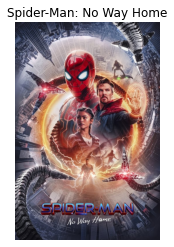

Recommendations



C:\Users\ckraft\AppData\Local\Temp/ipykernel_19140/2457862279.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


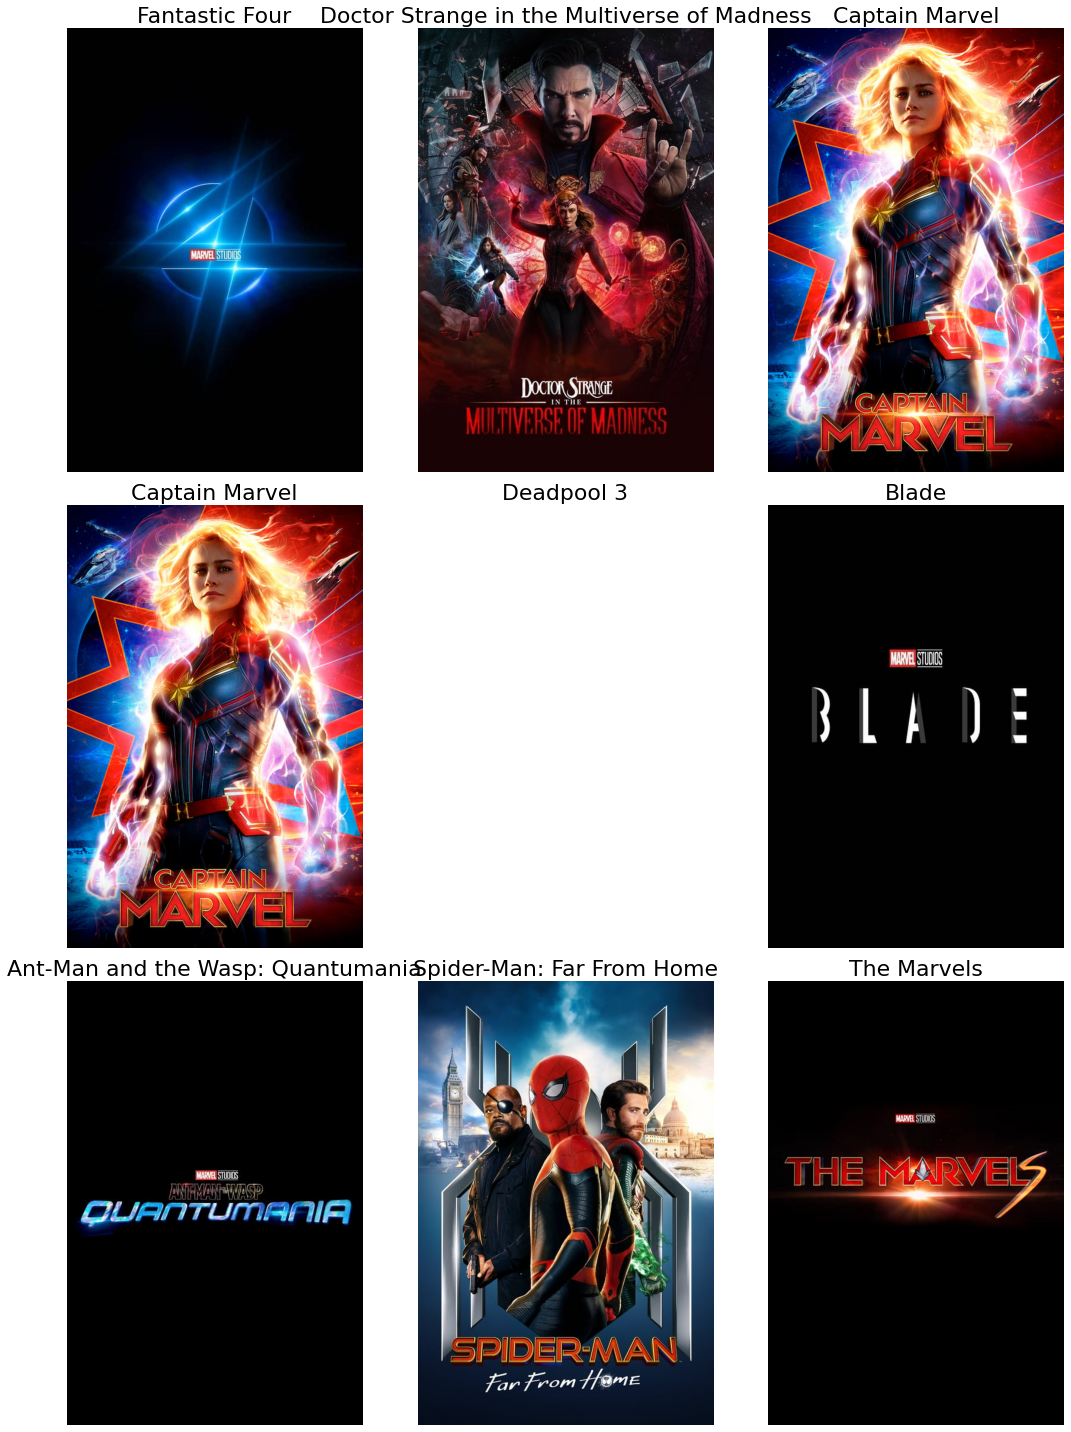

In [72]:
get_recs("Spider-Man: No Way Home")